# CA1

### •	Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. 

In [25]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#reading file
data = pd.read_csv("log2.csv")

data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


Let's start using .describe() and .info() to pull information about the dataset. 

- .describe() - Allow the understanding of each feature (Column). It is possible to see on the numerical features the huge gap between the Q3(75%) and the max values. Also, the categorical values "NATSource Port" and "NAT Destination Port" have a huge presence of 0 values.
- .info() - Effect way to check for missing or null values.

In [3]:
data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


### Understanding the target value (Action) 

we were provided with a network log dataset that contains 65k observations. 
- 57.43% "Allow"
- 22.86% "Deny"
- 19.61% "Drop"
- 0.08% "Reset-both"

Absolute Frequencies:
Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

Percentages:
Action
allow         0.574376
deny          0.228697
drop          0.196103
reset-both    0.000824
Name: proportion, dtype: float64


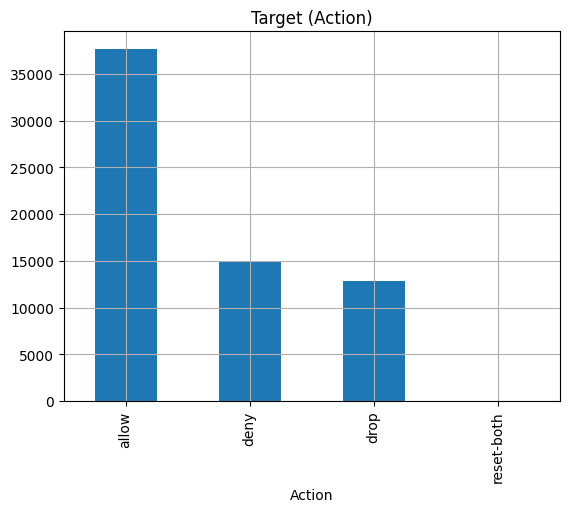

In [5]:
# target distribution
print('Absolute Frequencies:')
print(data.Action.value_counts())
print()

print('Percentages:')
print(data.Action.value_counts(normalize=True))

data.Action.value_counts().plot(kind='bar')
plt.title('Target (Action)')
plt.grid()
plt.show()

### Analyzing Numerical features.

 The values are written in scientific notation, also known as exponential notation. I used "np.log10(1+x)" to compress the large scale of the numerical values to a more manageable range. 

- Upon analyzing the boxplot, it is evident that most of the features have a right-skewed distribution. This kind of skewness suggests that many observations typically involve smaller amounts of data or packets. However, it also indicates that some observations contain outliers that involve larger values (data or packets). In this context, it might be explained as large files transfers or streaming sessions on the network traffic.
- After analyzing the histograms, it confirms that the majority of the observations contain small values (data or packet), then going towards the lower end of the graph with bigger values.

In [6]:
features_num = ['Bytes', 'Bytes Sent', 'Bytes Received',
                'Packets', 'Elapsed Time (sec)', 
                'pkts_sent', 'pkts_received']

In [23]:
# define log trafo for numerical features
def graph(x):
    return np.log10(1+x)

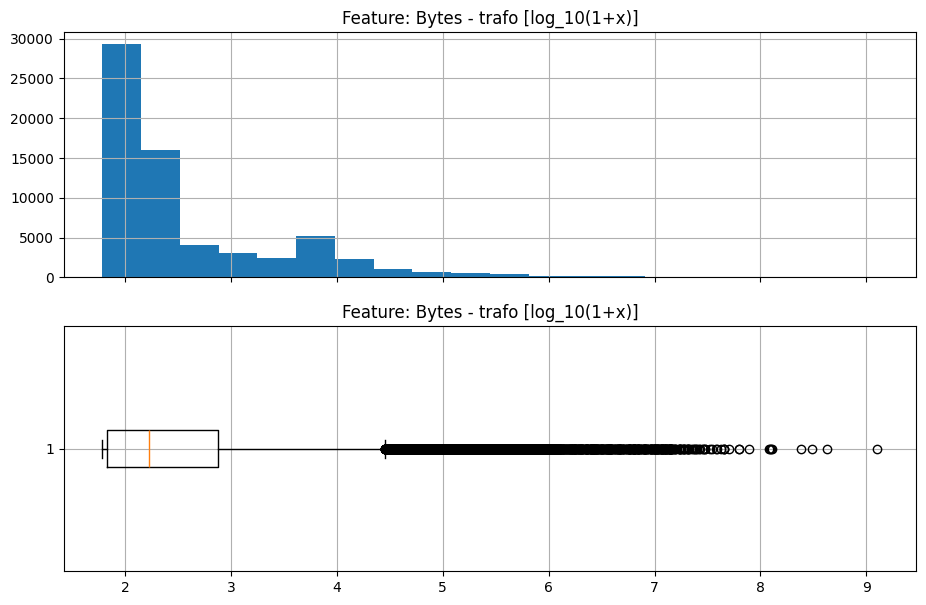

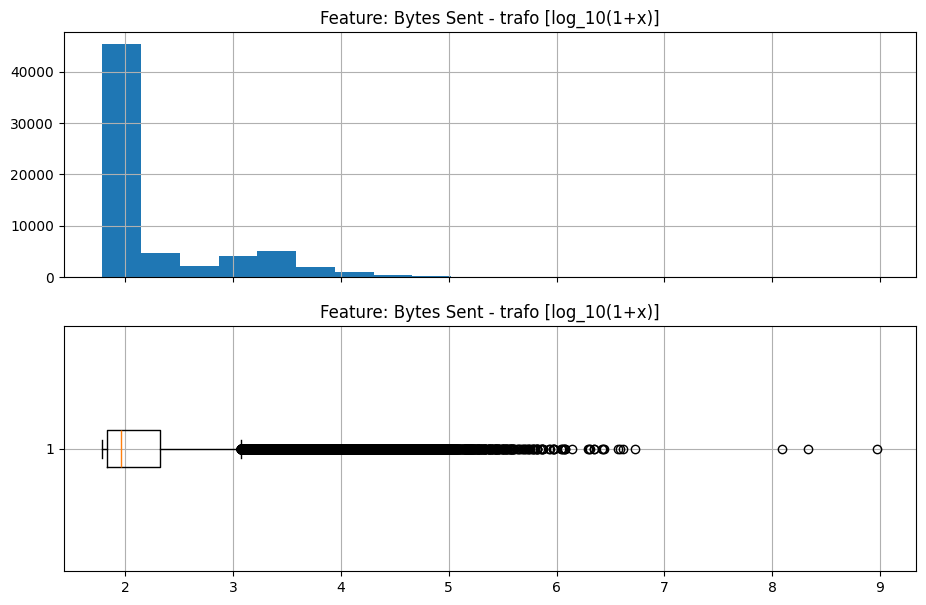

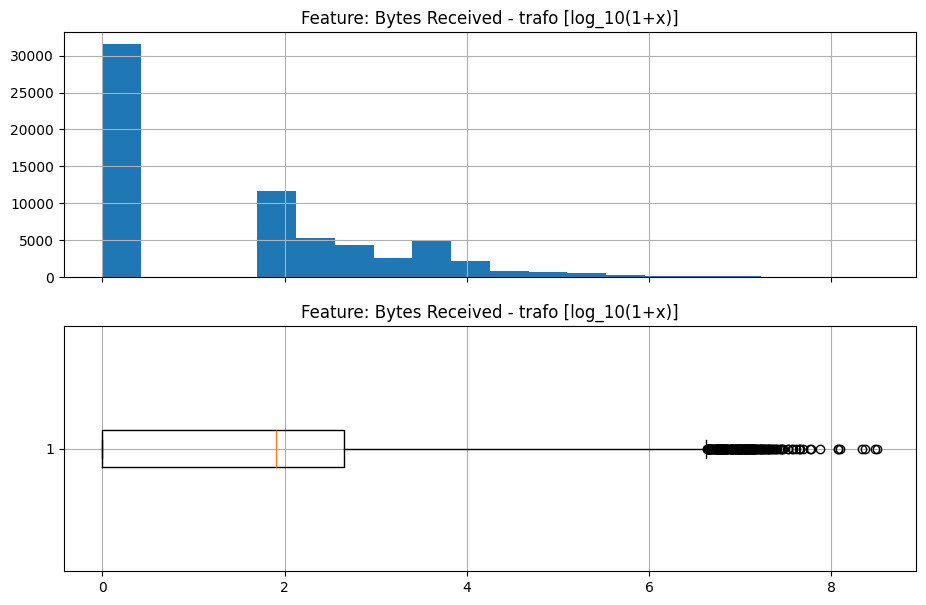

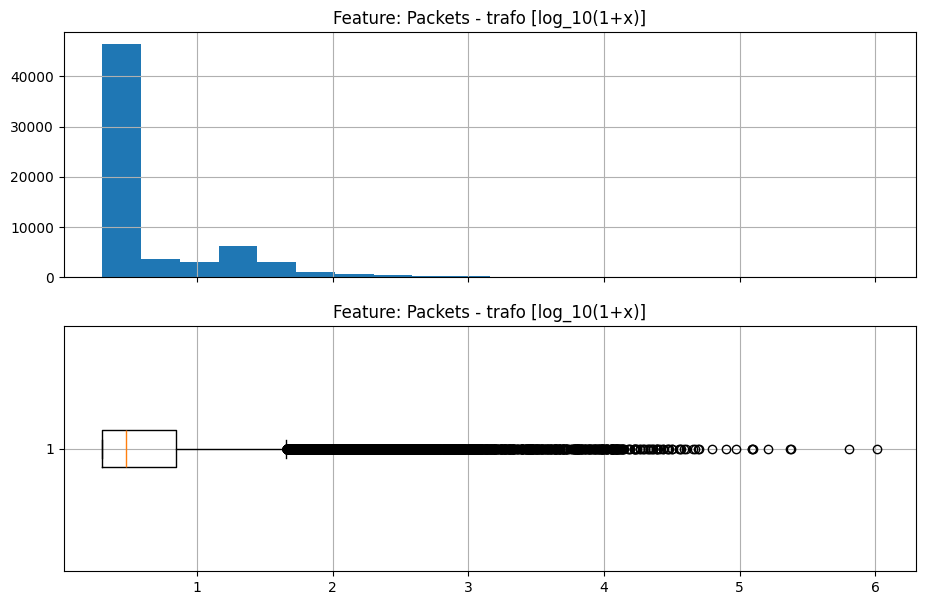

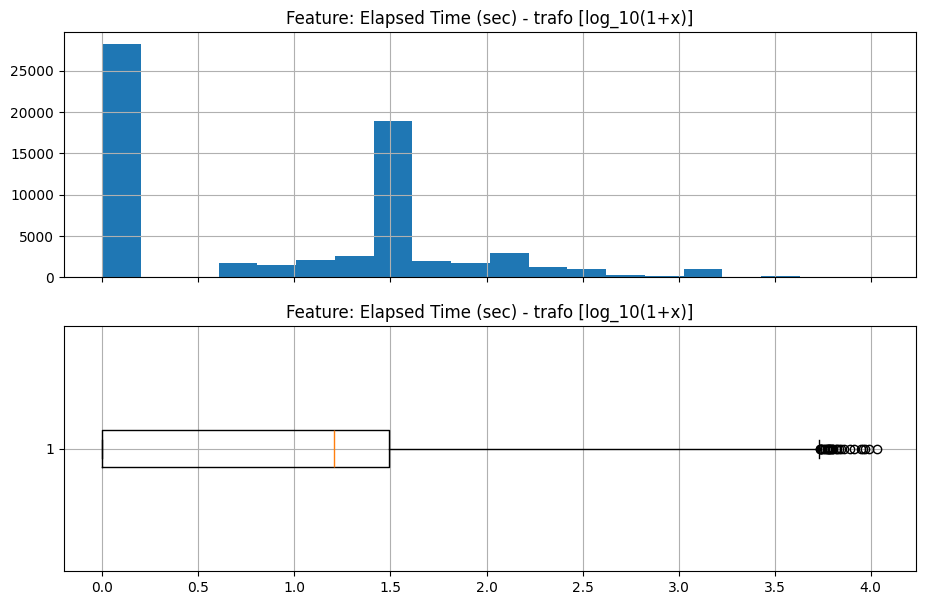

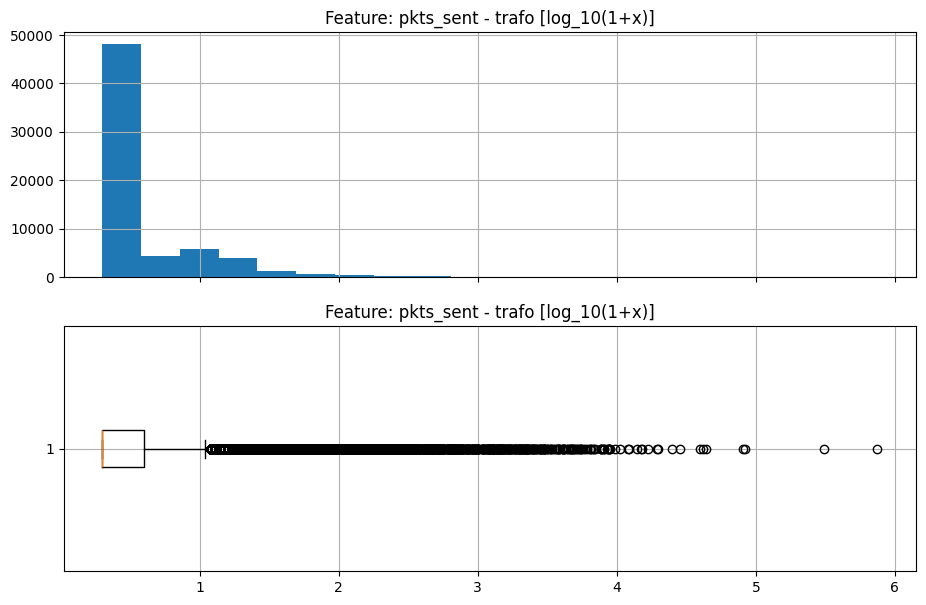

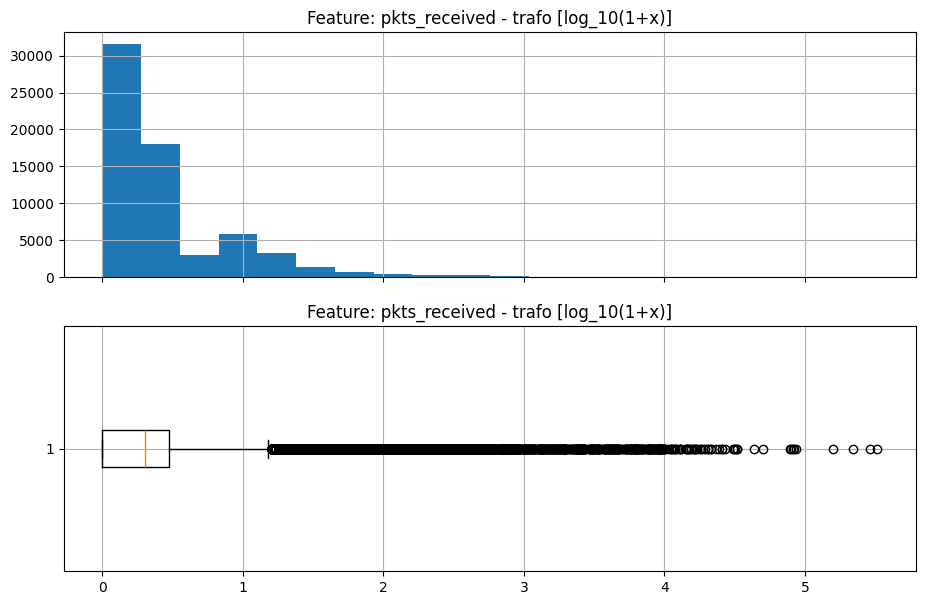

In [24]:
# plot distribution of numerical features
for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,7), sharex=True)
    ax1.hist(graph(data[f]), bins=20)
    ax1.grid()
    ax1.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    ax2.boxplot(graph(data[f]), vert=False)
    ax2.grid()   
    ax2.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    plt.show()

### Analyzing Categorical Features

Even though these features are composed of numbers only, each number represents a specific port on the network (e.g. 443 = HTTPS). In this case would make no sense to use a boxplot as the range of the numbers won't mean anything. Instead, I have counted the most 10 values that appear on each feature.

#### Most used ports in the dataset:
- Source Port: Port 58638 (TCP/UCP).
- Destination Port: Port 53 (DNS), 445 (SMB) and 443(HTTPS).
- NAT Source Port: Port 0 has 28432 observations. * Might be represented by sessions that did NOT require a NAT Source Port, or missed data or packet.
- NAT Destination Port: There are an equal number of 0s, but there are significant observations for ports 53 and 443, 15094 and 11678 respectively.

In [9]:
features_cat = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

Feature: Source Port
Source Port
58638    840
27005    513
443      273
57470    222
49418    210
6881     177
0        173
50584    116
3478     105
26900    102
Name: count, dtype: int64



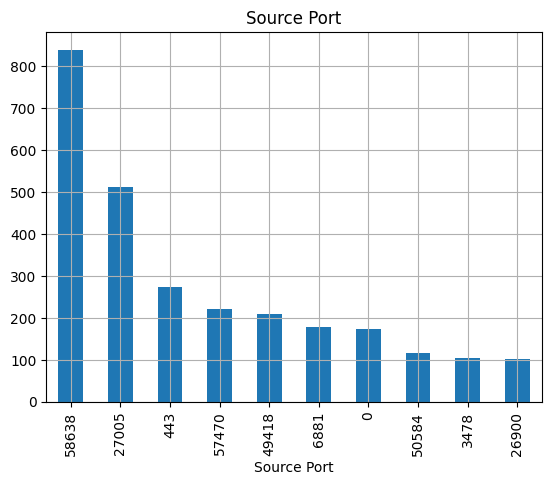

Feature: Destination Port
Destination Port
53       15414
445      12891
443      11684
80        4035
25174     1087
5900       909
37965      826
22114      767
64147      756
50584      717
Name: count, dtype: int64



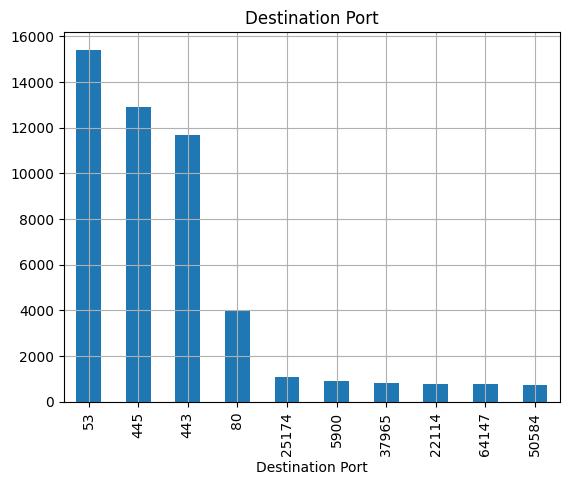

Feature: NAT Source Port
NAT Source Port
0        28432
48817       83
58638       51
50116       15
7986         5
30399        5
43757        5
57880        5
57596        5
60868        5
Name: count, dtype: int64



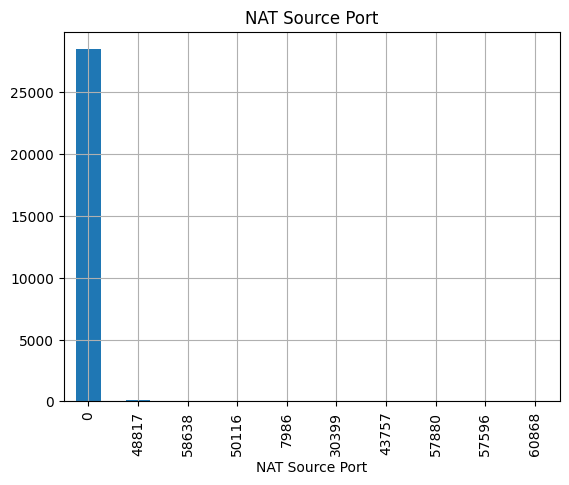

Feature: NAT Destination Port
NAT Destination Port
0        28432
53       15094
443      11678
80        4028
27015      234
27017      160
123        156
3389       156
6881       143
5228       100
Name: count, dtype: int64



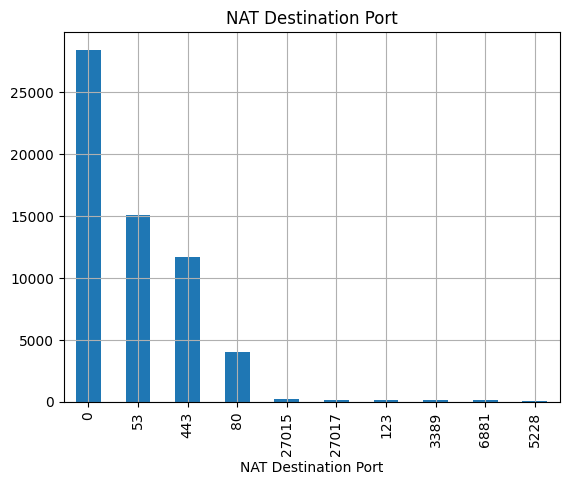

In [10]:
# show only top 10 levels for each feature
for f in features_cat:
    print('Feature:', f)
    print(data[f].value_counts()[0:10])
    print()
    data[f].value_counts()[0:10].plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

Feature:Source Port - Top 10 levels only


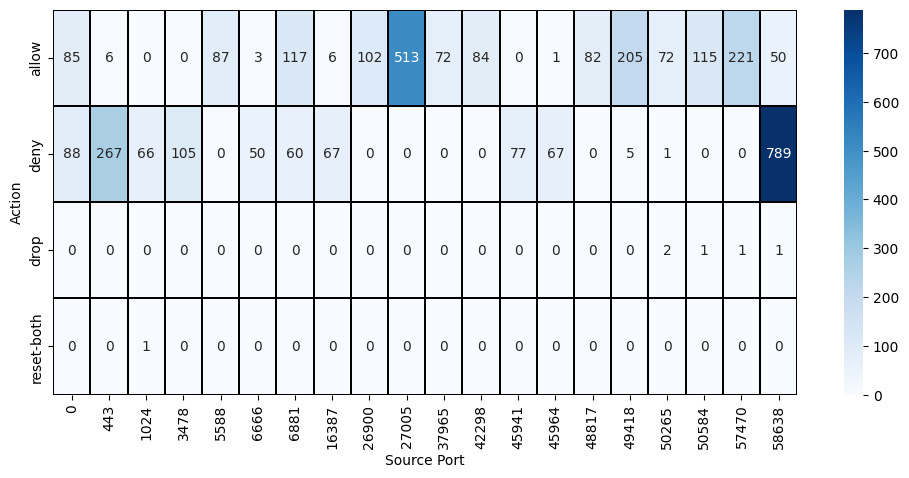

Feature:Destination Port - Top 10 levels only


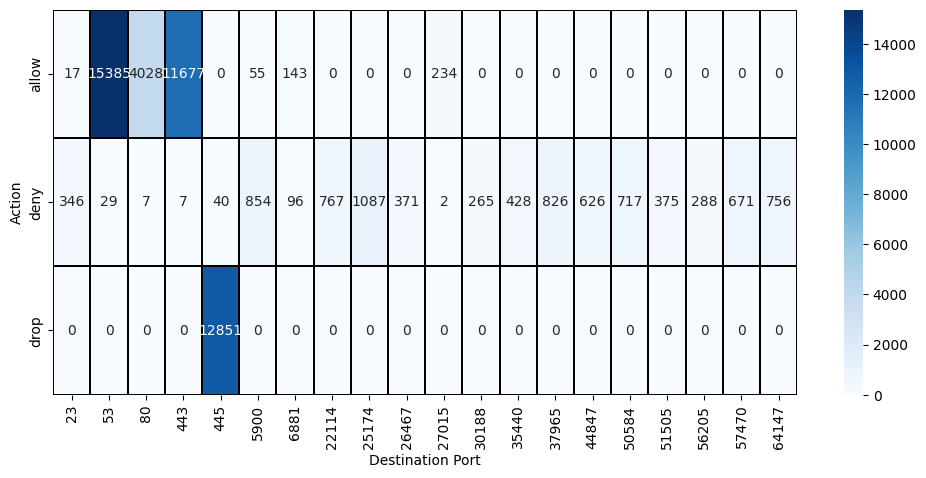

Feature:NAT Source Port - Top 10 levels only


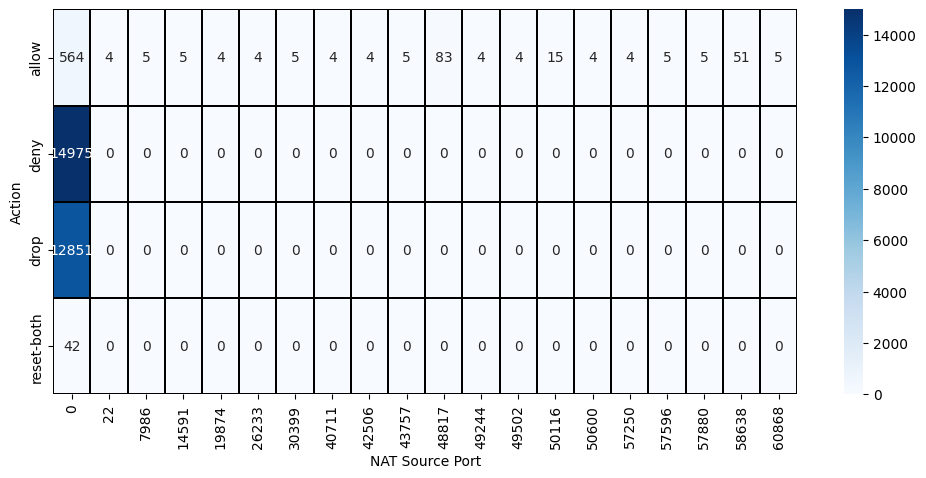

Feature:NAT Destination Port - Top 10 levels only


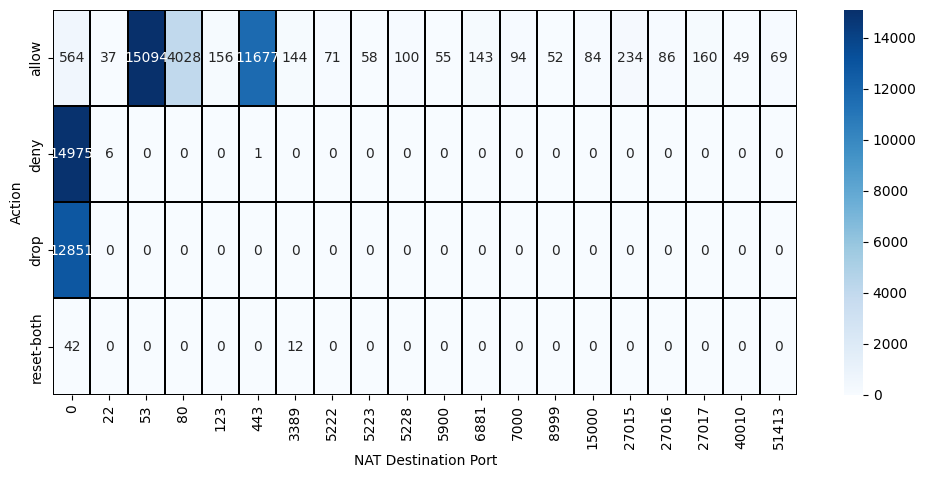

In [28]:
# visualize crosstable target vs feature (using top 10 levels only)
for f in features_cat:
    top10_levels = data[f].value_counts()[0:20].index.to_list()
    data_temp = data[data[f].isin(top10_levels)]
    ctab = pd.crosstab(data_temp.Action, data_temp[f])
    print('Feature:' + f + ' - Top 10 levels only')
    plt.figure(figsize=(12,5))
    sns.heatmap(ctab, annot=True, fmt='d', 
                cmap='Blues',
                linecolor='black',
                linewidths=0.1)
    plt.show()

In [31]:
data.drop(columns=['Action'], inplace = True)

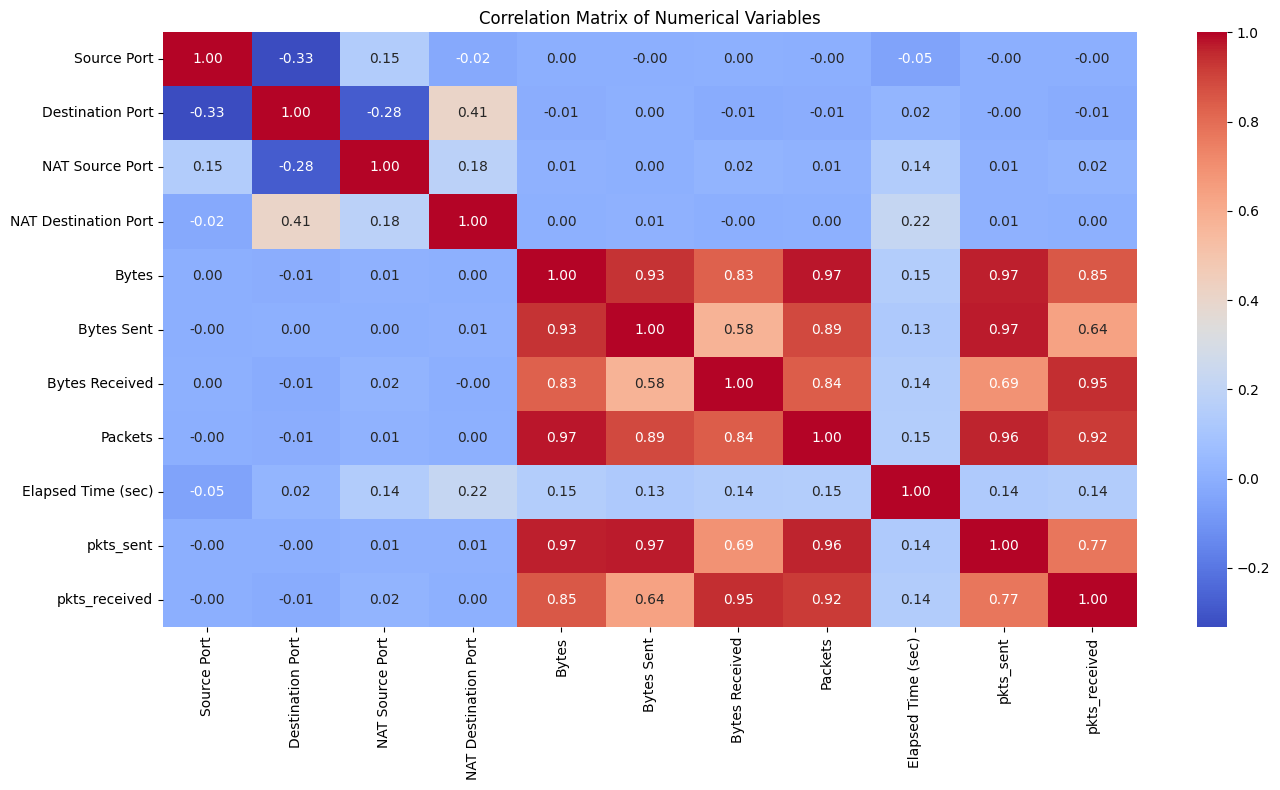

In [35]:
# Calculate the correlation matrix for the entire dataset
correlation_matrix = data.corr()


# Plot the heatmap for the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks()
plt.yticks()
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [14]:
# Calculate the top unique values for each column
top_unique_values = {column: data[column].value_counts().head(3) for column in data.columns}

top_unique_values

{'Source Port': Source Port
 58638    840
 27005    513
 443      273
 Name: count, dtype: int64,
 'Destination Port': Destination Port
 53     15414
 445    12891
 443    11684
 Name: count, dtype: int64,
 'NAT Source Port': NAT Source Port
 0        28432
 48817       83
 58638       51
 Name: count, dtype: int64,
 'NAT Destination Port': NAT Destination Port
 0      28432
 53     15094
 443    11678
 Name: count, dtype: int64,
 'Bytes': Bytes
 70    10651
 66     9454
 62     5658
 Name: count, dtype: int64,
 'Bytes Sent': Bytes Sent
 70    11015
 66     9494
 62     5679
 Name: count, dtype: int64,
 'Bytes Received': Bytes Received
 0     31574
 83     1068
 90      894
 Name: count, dtype: int64,
 'Packets': Packets
 1    29829
 2    16629
 4     1852
 Name: count, dtype: int64,
 'Elapsed Time (sec)': Elapsed Time (sec)
 0     28265
 30    10322
 31     3328
 Name: count, dtype: int64,
 'pkts_sent': pkts_sent
 1    45253
 2     2909
 3     1446
 Name: count, dtype: int64,
 'pkts_r